In [148]:
#!pip install opendatasets
#import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
# upload kaggle.json and the data will automatically be read

#od.download("https://www.kaggle.com/datasets/andrewmvd/isic-2019", force=True)

#path = "isic-2019"

In [150]:
import os
print(os.listdir("../input"))

['isic-2019']


In [151]:
path = "../input/isic-2019/"
meta = pd.read_csv(path + 'ISIC_2019_Training_GroundTruth.csv')
#meta = pd.read_csv(path + 'ISIC_2019_Training_Metadata.csv')
meta.head(20)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0000007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ISIC_0000008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0000009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0000010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
md = pd.read_csv(path + 'ISIC_2019_Training_Metadata.csv')
md

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [153]:
import pandas as pd

# binary encoding to a column of strings
meta['lesion_id'] = meta.iloc[:, 1:].apply(lambda row: row.idxmax(), axis=1)

# convert lesion_id to lowercase
meta["lesion_id"] = meta['lesion_id'].str.lower()
meta.head(10)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,lesion_id
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mel
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mel
5,ISIC_0000006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
6,ISIC_0000007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
7,ISIC_0000008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
8,ISIC_0000009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv
9,ISIC_0000010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv


In [154]:
# description from ISIC
lesion_types = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'ak': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma',
    'scc' : 'squamous cell carcinoma',
    'unk' : 'unknown'
}

lesion_type_short = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'ak': 4,
    'vasc': 5,
    'df': 6,
    'scc' : 7,
    'unk' : 8
}

lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma', "Squamous cell carcinoma", "Unknown"]

lesion_names_short = ['nv','mel','bkl','bcc','ak','vasc','df']

meta['lesion_type']=meta['lesion_id'].map(lesion_types)
meta['lesion_type_short'] = meta['lesion_id'].map(lesion_type_short)

print('Total number of images %i' %(len(meta)))

meta['lesion_type'].value_counts()

Total number of images 25331


Melanocytic nevi                  12875
Melanoma                           4522
Basal cell carcinoma               3323
Benign keratosis-like lesions      2624
Actinic keratoses                   867
squamous cell carcinoma             628
Vascular lesions                    253
Dermatofibroma                      239
Name: lesion_type, dtype: int64

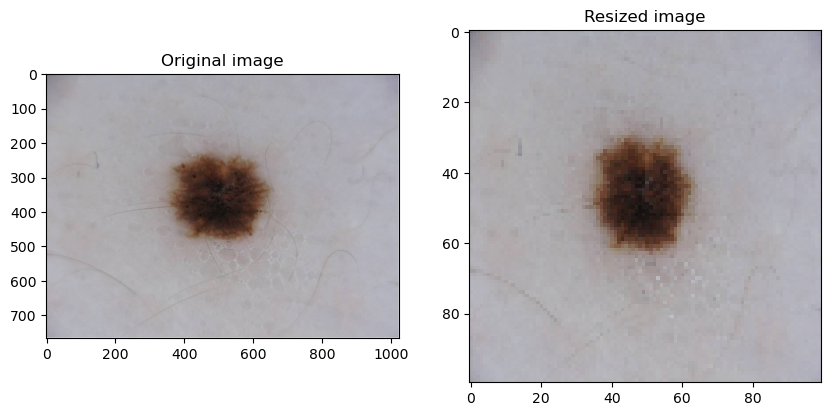

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from cv2 import imread, resize

# retrieve images
images = np.array(meta['image'])
folder = path + 'ISIC_2019_Training_Input/ISIC_2019_Training_Input/' + str(images[1]) + '.jpg'
img = imread(folder)

resized_img = resize(img,(100,100))

# show one exampe image

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(resized_img[:,:,::-1])
plt.title('Resized image')
plt.show()

In [156]:
# remove all unknowns and squamous cell carcinoma entries
import pandas as pd

# Assuming your existing dataframe is named 'df'
#meta = meta[(meta['lesion_type_short'] != 7) & (meta['lesion_type_short'] != 8)]
meta['lesion_type'].value_counts()

Melanocytic nevi                  12875
Melanoma                           4522
Basal cell carcinoma               3323
Benign keratosis-like lesions      2624
Actinic keratoses                   867
squamous cell carcinoma             628
Vascular lesions                    253
Dermatofibroma                      239
Name: lesion_type, dtype: int64

In [157]:
import os
import cv2
from cv2 import imread, resize

# function for importing images from the two folders
# augment argument is set to false 
# because images are only used for evaluation purposes
def image_importer(path, append=True, X:list=[], y:list=[], augment=True):
  dir_list = os.listdir(path)
  #dir_list = np.array(meta['image'])

  if append:
    # allows for adding images to established containers
    pass
  else:
    # initialize empty containers for predictor and target images
    X = []
    y = []
  try:
      for i in range(len(dir_list)):
          fname_image = dir_list[i]
          if fname_image[-3:] != "jpg":
            continue
          fname_id = fname_image.replace('.jpg','')

          # features|predictors
          folder = path + str(fname_image)
          img = imread(folder)
          resized_img = resize(img,(100, 100))
          X.append(resized_img)

          # targets|predicted
          output = np.array(meta[meta['image'] == fname_id].lesion_type_short)
          y.append(output[0])

          if augment:
              # add more images for class between 1-6, by rotation and flipping
              if output != 0:
                  new_img = augment(resized_img)
                  for i in range(5):
                      X.append(new_img[i])
                      y.append(output[0])
          else:
            pass

              # print progress
          if append==False and i % int(100) == 0: # (not append)
             # print(i,'images loaded')
             # "{char_start:filler<right^center>left-ragged[f_loat,d_ecimal, s_tring]}".format(...)
              print("{0:-<7d}".format(i), "images loaded") # d stands for decimal
          elif append and (len(dir_list)+i) % int(100) == 0:
            #print((len(X)+i), "images loaded")
              print("{0:-<7d}".format(len(dir_list)+i), "images loaded")
          
          if i == 500:
                break
  except BaseException:
     return X, y

  return X, y

In [159]:
training_img = path + "ISIC_2019_Training_Input/ISIC_2019_Training_Input/"
# importing the images and storing them the feature variable X
X, y = image_importer(training_img, append=False, augment=False)

0------ images loaded
100---- images loaded
200---- images loaded
300---- images loaded
400---- images loaded
500---- images loaded


In [160]:
X = np.array(X)
y = np.array(y)

In [161]:
# matrix dimensions
print(X.shape)
print(y.shape)

(501, 100, 100, 3)
(501,)


Removing "squamous cell carcinoma" and "unknown" from the data as the models have not been trained on these classes

In [162]:
import numpy as np



# binary mask
mask = (y >= 0) & (y <= 6)

# filter X and y by mask to omit the two additional classes (scc and unk)
X_filtered = X[mask]
y_filtered = y[mask]

# Display the shapes of the filtered arrays
print("X_filtered shape:", X_filtered.shape)
print("y_filtered shape:", y_filtered.shape)


X_filtered shape: (486, 100, 100, 3)
y_filtered shape: (486,)


In [163]:
y_train = to_categorical(y_filtered, num_classes=7)
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Importing the models trained

In [164]:
!pip install opendatasets
!wget https://raw.githubusercontent.com/MarkusStefan/DeepCNN_SoftAttention/main/kaggle.json
import opendatasets as od

--2023-06-20 16:31:31--  https://raw.githubusercontent.com/MarkusStefan/DeepCNN_SoftAttention/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67 [text/plain]
Saving to: ‘kaggle.json.2’

kaggle.json.2       100%[===================>]      67  --.-KB/s    in 0s      

2023-06-20 16:31:31 (5.39 MB/s) - ‘kaggle.json.2’ saved [67/67]



In [165]:
# upload kaggle.json and the data will automatically be read

od.download("https://www.kaggle.com/datasets/markuskfler/models", force=True)

100%|██████████| 451M/451M [00:13<00:00, 34.5MB/s] 


In [166]:
model_path = "/kaggle/working/models/"

# CNN

In [167]:
import keras
from keras.models import load_model
# from tensorflow.keras import models
cnn = load_model(model_path+"CNN.h5")

In [168]:
y_pred = cnn.predict(X_filtered)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_filtered[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)

    total += 1

print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)

print('Accuracy:', round(accurate/total*100, 3), '%')

16/16 [==============================] - 1s 28ms/step
Total-test-data; 486 	accurately-predicted-data: 349 	 wrongly-predicted-data:  137
Accuracy: 71.811 %


In [169]:
# compute predictions
y_pred_prob = np.around(cnn.predict(X_filtered),3)
y_pred = np.argmax(y_pred_prob,axis=1)

y_test2 = y_filtered

meta

16/16 [==============================] - 0s 27ms/step


,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,lesion_id,lesion_type,lesion_type_short
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv,Melanocytic nevi,0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv,Melanocytic nevi,0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mel,Melanoma,1
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv,Melanocytic nevi,0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mel,Melanoma,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bcc,Basal cell carcinoma,3
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,bkl,Benign keratosis-like lesions,2
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mel,Melanoma,1
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nv,Melanocytic nevi,0


In [170]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from tensorflow.python.platform import build_info as tf_build_info

predictions = cnn.predict(X_filtered)

#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)
targetnames = ['nv','mel','bkl','bcc','ak','vasc','df']
#getting the true labels per image 
#y_true = X_test.classes
#y_true = np.argmax(X_test, axis=1)
#y_true = lesion_names[X_test]
y_true = [lesion_names_short[y_test2[index]] for index in range(len(y_test2))]
y_true = [lesion_type_short[c] for c in y_true]
#getting the predicted labels per image 
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# Creating classification report 
report = classification_report(y_true, y_pred, target_names=targetnames)

print("\nClassification Report:")
print(report)

16/16 [==============================] - 0s 28ms/step

Classification Report:
              precision    recall  f1-score   support

          nv       0.64      0.88      0.74       257
         mel       0.51      0.27      0.35        89
         bkl       0.47      0.46      0.46        48
         bcc       0.88      0.24      0.38        62
          ak       0.42      0.31      0.36        16
        vasc       1.00      0.45      0.62        11
          df       0.00      0.00      0.00         3

    accuracy                           0.61       486
   macro avg       0.56      0.37      0.42       486
weighted avg       0.63      0.61      0.58       486



# CNN+SA

In [171]:
!wget https://raw.githubusercontent.com/MarkusStefan/DeepCNN_SoftAttention/main/SoftAttention.py

--2023-06-20 16:31:54--  https://raw.githubusercontent.com/MarkusStefan/DeepCNN_SoftAttention/main/SoftAttention.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3387 (3.3K) [text/plain]
Saving to: ‘SoftAttention.py.2’

SoftAttention.py.2  100%[===================>]   3.31K  --.-KB/s    in 0s      

2023-06-20 16:31:54 (45.8 MB/s) - ‘SoftAttention.py.2’ saved [3387/3387]



In [172]:
import keras
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from keras.layers.core import Dropout, Activation
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Input
from keras.layers import concatenate
from SoftAttention import SoftAttention
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam

input_layer = Input(shape=(100, 100, 3))

deep = Conv2D(filters=64, kernel_size=(5, 5), strides=(3, 3), activation='relu')(input_layer)
deep = BatchNormalization()(deep)
deep = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(deep)

deep = Conv2D(filters=128, kernel_size=(3, 3), strides=(3, 3), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)
deep = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(deep)

deep = Conv2D(filters=256, kernel_size=(3, 3), strides=(3, 3), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)

deep = Conv2D(filters=512, kernel_size=(3, 3), strides=(3, 3), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)

# SOFT ATTENTION LAYER
# parameter ch => number of channels in the input feature map. It is used to determine the dimensionality of the attention maps.
# parameter m => number of attention maps to be generated in the Soft Attention layer. These attention maps capture the importance or relevance of different spatial locations within the input feature map.
soft_attention, mapping = SoftAttention(ch=int(deep.shape[-1]), m=10, concat_with_x=False, aggregate=True, name="SOFT-ATTENTION")(deep)
soft_attention = (MaxPool2D(pool_size=(3, 3), padding="same")(soft_attention))
deep = (MaxPool2D(pool_size=(3, 3), strides=(2,2), padding="same")(deep))
deep = concatenate([deep, soft_attention])
deep = Activation("relu")(deep)
#deep = Dropout(0.5)(deep)

deep = Conv2D(filters=512, kernel_size=(3, 3), strides=(3, 3), activation='relu', padding="same")(deep)
deep = BatchNormalization()(deep)
deep = MaxPool2D(pool_size=(1, 1), strides=(2, 2))(deep)

deep = Flatten()(deep)

deep = Dense(4096, activation='relu')(deep)
deep = Dropout(0.5)(deep)

deep = Dense(4096, activation='relu')(deep)
deep = Dropout(0.5)(deep)

output = Dense(7, activation='softmax')(deep)

cnn_sa = Model(inputs=input_layer, outputs=output)

In [173]:
import keras
from keras.models import load_model
from SoftAttention import SoftAttention
# load the weights from previous trainings
cnn_sa.load_weights(model_path+"CNN_SA.h5")

In [174]:
y_pred = cnn_sa.predict(X_filtered)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_filtered[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)

    total += 1

print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)

print('Accuracy:', round(accurate/total*100, 3), '%')

16/16 [==============================] - 1s 29ms/step
Total-test-data; 486 	accurately-predicted-data: 266 	 wrongly-predicted-data:  220
Accuracy: 54.733 %


16/16 [==============================] - 1s 31ms/step


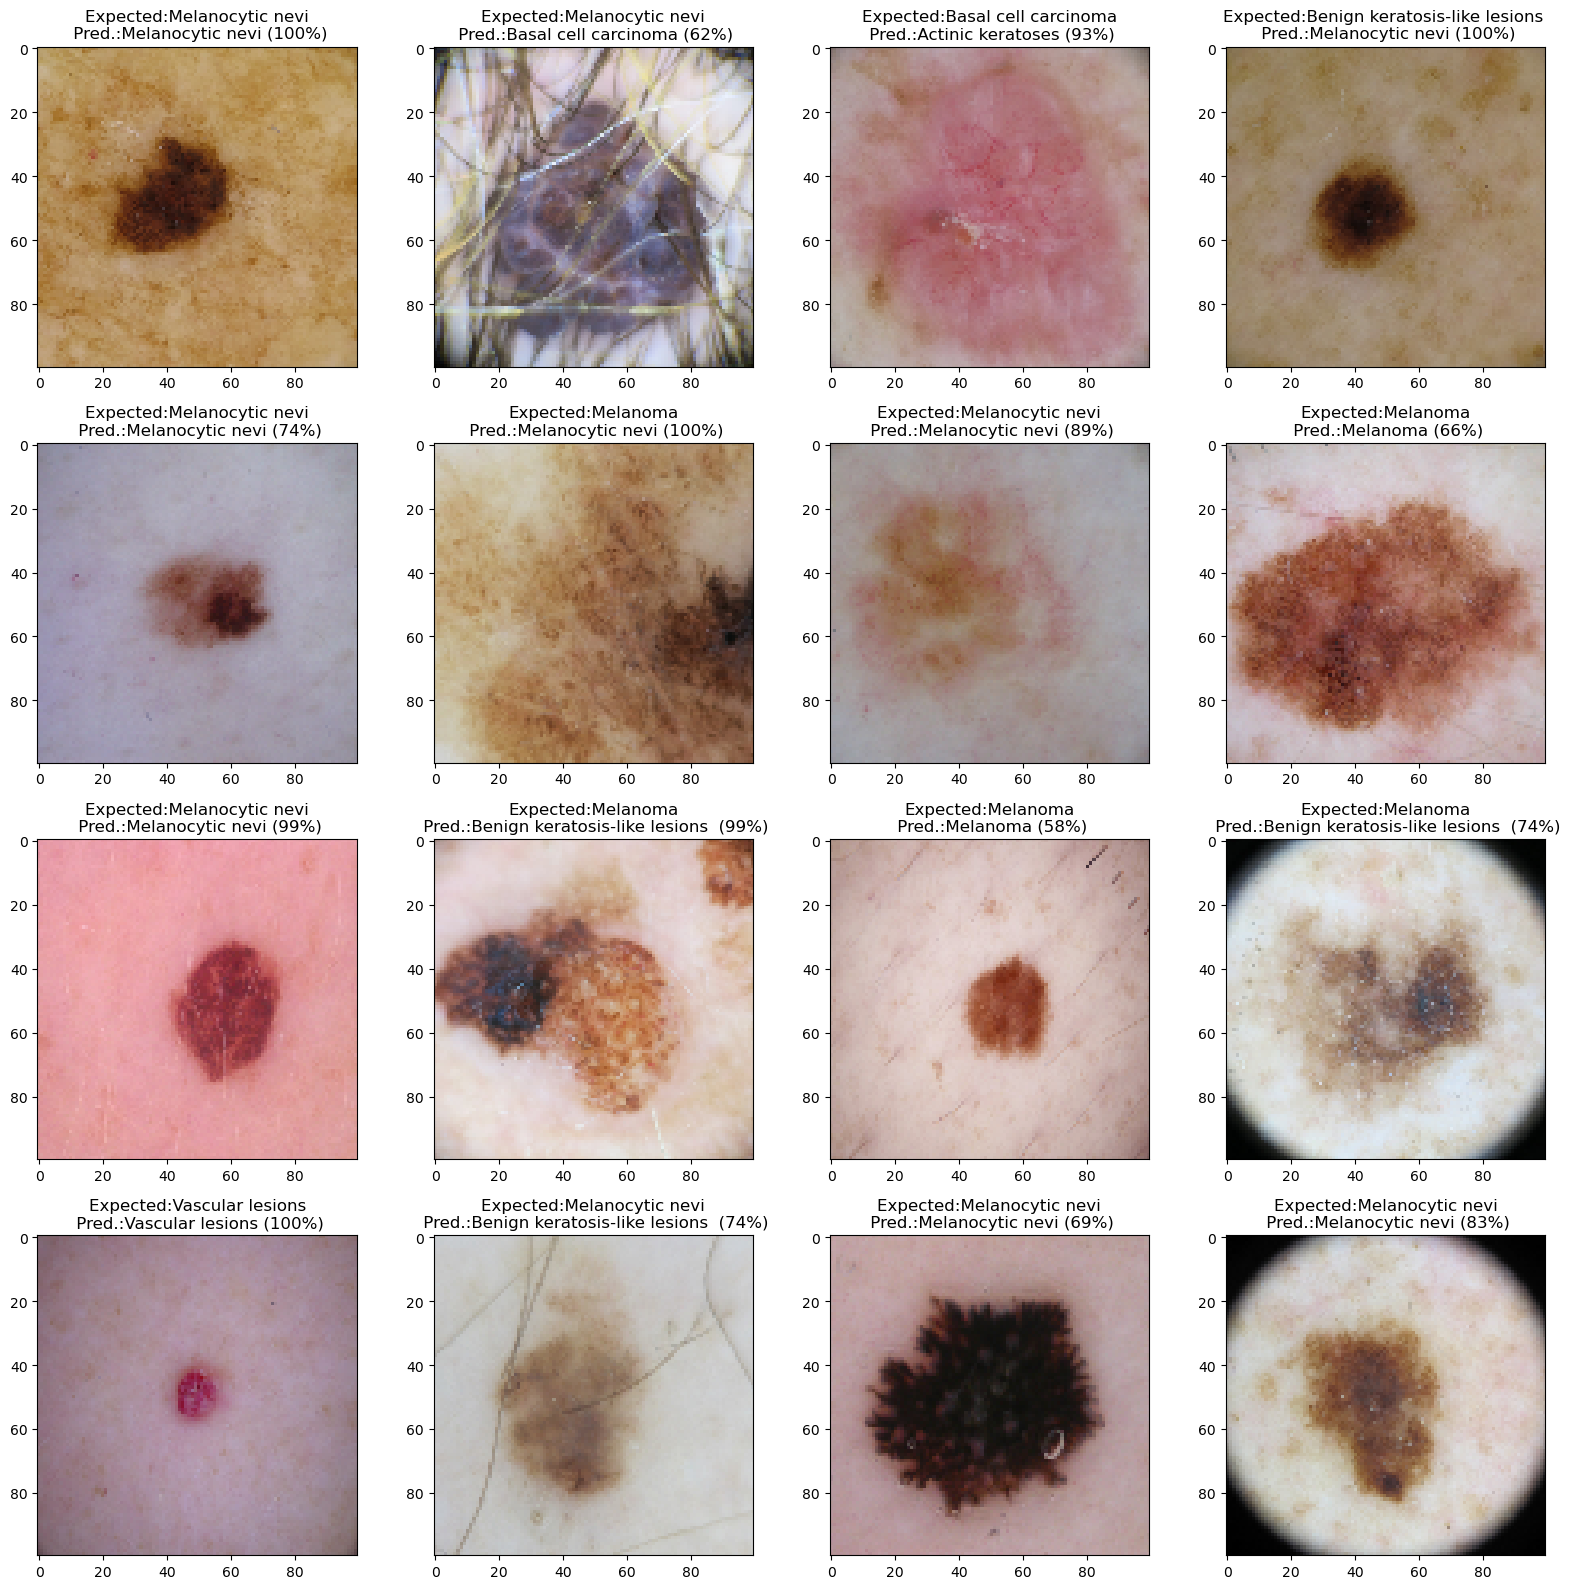

In [175]:
# compute predictions
y_pred_prob = np.around(cnn_sa.predict(X_filtered),3)
y_pred = np.argmax(y_pred_prob,axis=1)

y_test2 = np.argmax(y_train,axis=1)

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(X_filtered[index,:,:,::-1])
    label_exp = lesion_names[y_test2[index]]  #expected label
    label_pred = lesion_names[y_pred[index]]  #predicted label
    label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred)+' ('+str(label_pred_prob)+'%)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('final_figure.png',dpi=300)
plt.show()